In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [142]:
data_path = os.path.join('Resources', 'cannabis_usage_1961_2018.csv')
data = pd.read_csv(data_path)

# Clean headers
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data

,ref_date,geo,dguid,prevalence,age_group,frequency_of_use,uom,uom_id,scalar_factor,scalar_id,vector,coordinate,value,status,symbol,terminated,decimals
0,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,"Total, all frequencies",Persons,249,units,0,v1001799865,1.1.1.1,277512.0,NaN,NaN,NaN,0
1,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,Once,Persons,249,units,0,v1001799866,1.1.1.2,17616.0,NaN,NaN,NaN,0
2,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,Less than once per month,Persons,249,units,0,v1001799867,1.1.1.3,97880.0,NaN,NaN,NaN,0
3,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,One to three times per month,Persons,249,units,0,v1001799868,1.1.1.4,51722.0,NaN,NaN,NaN,0
4,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),Persons,249,units,0,v1001799869,1.1.1.5,70428.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,2018,Canada,2016A000011124,Volume of cannabis consumed,65 years and over,Once,Kilograms,192,units,0,v1001799932,1.2.6.2,NaN,..,NaN,NaN,0
4172,2018,Canada,2016A000011124,Volume of cannabis consumed,65 years and over,Less than once per month,Kilograms,192,units,0,v1001799933,1.2.6.3,NaN,..,NaN,NaN,0
4173,2018,Canada,2016A000011124,Volume of cannabis consumed,65 years and over,One to three times per month,Kilograms,192,units,0,v1001799934,1.2.6.4,NaN,..,NaN,NaN,0
4174,2018,Canada,2016A000011124,Volume of cannabis consumed,65 years and over,At least once a week (excludes daily),Kilograms,192,units,0,v1001799935,1.2.6.5,NaN,..,NaN,NaN,0


In [82]:
data = data.drop(['geo', 'dguid', 'uom', 'uom_id', 'scalar_factor', 'scalar_id', 'vector', 'status', 'symbol', 'terminated', 'decimals'], axis=1)
data.head()

,ref_date,prevalence,age_group,frequency_of_use,coordinate,value
0,1961,Consuming population of cannabis,15 years and over,"Total, all frequencies",1.1.1.1,277512.0
1,1961,Consuming population of cannabis,15 years and over,Once,1.1.1.2,17616.0
2,1961,Consuming population of cannabis,15 years and over,Less than once per month,1.1.1.3,97880.0
3,1961,Consuming population of cannabis,15 years and over,One to three times per month,1.1.1.4,51722.0
4,1961,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),1.1.1.5,70428.0


In [83]:
annual_age_consumption = data.loc[(data.frequency_of_use == 'Total, all frequencies') & (data.prevalence == 'Consuming population of cannabis') & (data.age_group != '15 years and over') & (data.age_group != '65 years and over'),:]
annual_age_consumption = annual_age_consumption.reset_index(drop=True)
annual_age_consumption

,ref_date,prevalence,age_group,frequency_of_use,coordinate,value
0,1961,Consuming population of cannabis,15 to 17 years,"Total, all frequencies",1.1.2.1,25976.0
1,1961,Consuming population of cannabis,18 to 24 years,"Total, all frequencies",1.1.3.1,147670.0
2,1961,Consuming population of cannabis,25 to 44 years,"Total, all frequencies",1.1.4.1,47466.0
3,1961,Consuming population of cannabis,45 to 64 years,"Total, all frequencies",1.1.5.1,56399.0
4,1962,Consuming population of cannabis,15 to 17 years,"Total, all frequencies",1.1.2.1,30871.0
...,...,...,...,...,...,...
227,2017,Consuming population of cannabis,45 to 64 years,"Total, all frequencies",1.1.5.1,1138798.0
228,2018,Consuming population of cannabis,15 to 17 years,"Total, all frequencies",1.1.2.1,305543.0
229,2018,Consuming population of cannabis,18 to 24 years,"Total, all frequencies",1.1.3.1,1377621.0
230,2018,Consuming population of cannabis,25 to 44 years,"Total, all frequencies",1.1.4.1,2171770.0


['15 to 17 years ', '18 to 24 years', '25 to 44 years', '45 to 64 years']


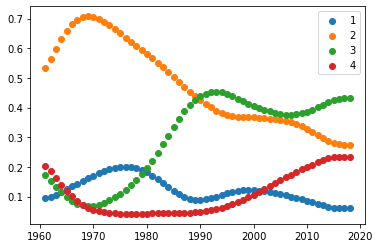

In [140]:
print(list(annual_age_consumption.age_group.unique()))

teen_over_time = annual_age_consumption.loc[annual_age_consumption.age_group == '15 to 17 years ', :]
college_over_time = annual_age_consumption.loc[annual_age_consumption.age_group == '18 to 24 years', :]
yopro_over_time = annual_age_consumption.loc[annual_age_consumption.age_group == '25 to 44 years', :]
boomer_over_time = annual_age_consumption.loc[annual_age_consumption.age_group == '45 to 64 years', :]

one = [sum(x) for x in zip(list(teen_over_time.value), list(college_over_time.value))]
two = [sum(x) for x in zip(one, list(yopro_over_time.value))]
three = [sum(x) for x in zip(two, list(boomer_over_time.value))]

plt.scatter(teen_over_time.ref_date, np.divide(teen_over_time.value, three))
plt.scatter(college_over_time.ref_date, np.divide(college_over_time.value, three))
plt.scatter(yopro_over_time.ref_date, np.divide(yopro_over_time.value, three))
plt.scatter(boomer_over_time.ref_date, np.divide(boomer_over_time.value, three))
plt.legend([1,2,3,4])

In [125]:
heat_array = []
heat_array.append(list(teen_over_time.value))
heat_array.append(list(college_over_time.value))
heat_array.append(list(yopro_over_time.value))
heat_array.append(list(boomer_over_time.value))

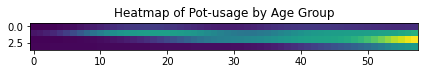

In [122]:
fig, ax = plt.subplots()
im = ax.imshow(heat_array)
ax.set_title("Heatmap of Pot-usage by Age Group")
fig.tight_layout()
plt.show()

In [127]:
np.divide(list(teen_over_time.value),list(college_over_time.value))

array([0.17590574, 0.17577393, 0.17804693, 0.18258317, 0.18899284,
       0.19689632, 0.20604958, 0.21641512, 0.22818317, 0.24124704,
       0.25513087, 0.26902983, 0.28239887, 0.29481655, 0.30577912,
       0.31462171, 0.32052551, 0.32261102, 0.32004964, 0.31250824,
       0.30058195, 0.28550379, 0.26881248, 0.25212847, 0.23671727,
       0.22332368, 0.21270388, 0.20584919, 0.20402674, 0.20836359,
       0.21923894, 0.23597965, 0.25654357, 0.27837177, 0.29854243,
       0.314527  , 0.3251909 , 0.33083606, 0.33246379, 0.33109791,
       0.32757269, 0.32238383, 0.3159106 , 0.30858556, 0.30076009,
       0.29263766, 0.28428661, 0.27583351, 0.26762273, 0.25964823,
       0.2517612 , 0.24376728, 0.23579403, 0.22785263, 0.21999345,
       0.21857037, 0.21709904, 0.22179032])

[277511.0,
 311469.0,
 359877.0,
 425587.0,
 511003.0,
 617554.0,
 744962.0,
 890321.0,
 1046973.0,
 1205391.0,
 1356581.0,
 1494236.0,
 1615766.0,
 1721209.0,
 1812213.0,
 1891274.0,
 1961085.0,
 2023942.0,
 2081153.0,
 2133357.0,
 2180907.0,
 2223304.0,
 2258604.0,
 2282769.0,
 2292387.0,
 2287591.0,
 2270973.0,
 2246525.0,
 2218792.0,
 2193842.0,
 2180398.0,
 2187548.0,
 2222323.0,
 2284573.0,
 2370062.0,
 2473932.0,
 2591370.0,
 2717544.0,
 2845804.0,
 2967056.0,
 3075339.0,
 3167126.0,
 3243169.0,
 3307344.0,
 3364915.0,
 3421040.0,
 3481937.0,
 3553704.0,
 3641689.0,
 3749195.0,
 3878263.0,
 4027093.0,
 4191011.0,
 4364163.0,
 4540921.0,
 4701239.0,
 4876544.0,
 5034949.0]